# Import Libraries


In [1]:
##data analysis libraries
import numpy as np
import pandas as pd

##visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import re 

%matplotlib inline
sns.set_style("darkgrid")

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Getting Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Training set shape is: ", train.shape)
print("Test set shape is: ", test.shape)

Training set shape is:  (891, 12)
Test set shape is:  (418, 11)


In [4]:
df = pd.concat([train, test], ignore_index=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
df.describe([.05, .1, .25, .75, .9, .95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
PassengerId,1309.0,655.000000,378.020061,1.00,66.400,131.8000,328.0000,655.0000,982.000,1178.20000,1243.60,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.000,0.0000,0.0000,0.0000,1.000,1.00000,1.00,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,1.000,1.0000,2.0000,3.0000,3.000,3.00000,3.00,3.0000
Age,1046.0,29.881138,14.413493,0.17,5.000,14.0000,21.0000,28.0000,39.000,50.00000,57.00,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.000,0.0000,0.0000,0.0000,1.000,1.00000,2.00,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.000,0.0000,0.0000,0.0000,0.000,2.00000,2.00,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.225,7.5675,7.8958,14.4542,31.275,78.05082,133.65,512.3292


In [8]:
(df.isnull().sum() *100 / df.shape[0]).sort_values(ascending = False)  #checking for null values ratio

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

### The First Observations 

- There are a total of 891 passengers in our training dataset.
- There are a total of 418 passengers in our test dataset. 
- There are 12 columns in the training dataset,the training set includes our target variable(dependent variable) , passenger survival status.
- 2 of the features are floats, 5 are integers and 5 are objects
- We have passengers of different titles.
- The Dataset have significantly missing values(%77.46) in the cabin column. From a socioeconomic point of view, passengers who do not have cabin information may be from a lower class . Hence it will directly affect the survival rate.I'll examine this feature elaborately.
- The Age feature have missing value approximately 20% . I should fill in these missing values as the age feature can have a significant effect on the survival rate
- 38.38% of the passengers in the training dataset survived.

# Data Cleaning

- Age,Cabin and Embarked have null values in the dataset. 

In [9]:
import missingno as msno

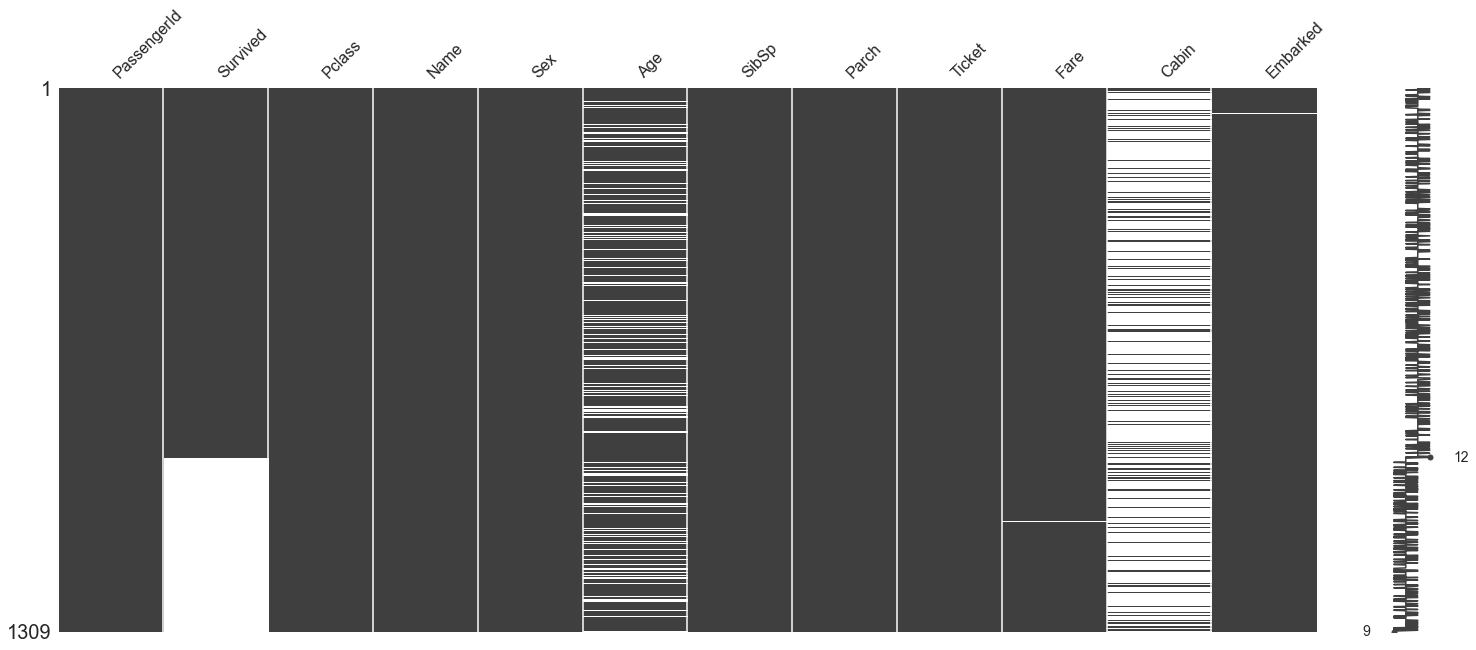

In [10]:
msno.matrix(df) # Visualize missing values as a matrix. The white lines indicate the missing values in each column. 
plt.show()

### Age Feature

In [11]:
df.Name[:20]  #checking titles

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [12]:
def title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [13]:
df['Title'] = df['Name'].map(title) 

In [14]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [15]:
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Officer') 
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir', 'Jonkheer', 'Don', 'Dona'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [16]:
df['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royal        6
Name: Title, dtype: int64

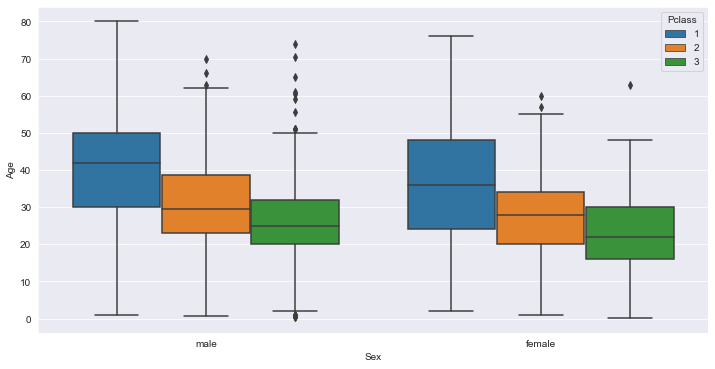

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Age', hue='Pclass', data=df);

In [18]:
df.groupby(['Sex', 'Pclass', 'Title']).Age.agg(['mean', 'median'])

mean  median
Sex    Pclass Title                     
female 1      Miss     30.131148    30.0
              Mrs      42.926471    45.0
              Officer  49.000000    49.0
              Royal    40.000000    39.0
       2      Miss     20.865714    20.0
              Mrs      33.518519    30.5
       3      Miss     17.360874    18.0
              Mrs      32.326531    31.0
male   1      Master    6.984000     6.0
              Mr       41.450758    41.5
              Officer  51.090909    52.0
              Royal    42.333333    40.0
       2      Master    2.757273     2.0
              Mr       32.346715    30.0
              Officer  40.700000    41.5
       3      Master    6.090000     6.0
              Mr       28.318910    26.0

- There is no serious exception to the assumption of normal distribution when we check for skewness.So we can fill in null values with median or mean.I'd rather fill null values with the mean.

In [19]:
df['Age'] = df.groupby(['Sex','Pclass','Title']).Age.apply(lambda x: x.fillna(x.mean()))

### Cabin Feature

In [20]:
from PIL import Image
image = Image.open('Titanic_cutaway_diagram.png')
image = image.resize((400, 600))

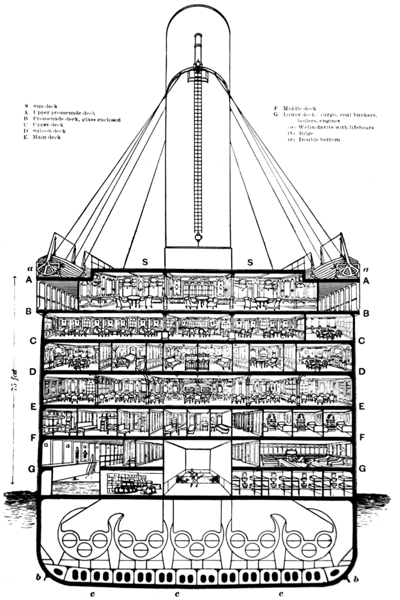

In [21]:
image

In [22]:
df['Cabin'] = df['Cabin'].str.extract('([a-zA-Z ]+)', expand=False)

- There is a significance with the letters rather than the numbers in cabin column.I will get help filling embark value from this variable.

In [23]:
print('Survival rate of passengers who do not have cabin information :', df.loc[df['Cabin'].isnull()].Survived.mean())
print('Survival rate of passengers who have cabin information :', df.loc[df['Cabin'].notnull()].Survived.mean())

Survival rate of passengers who do not have cabin information : 0.29985443959243085
Survival rate of passengers who have cabin information : 0.6666666666666666


In [24]:
df['Cabin'].value_counts()

C      94
B      65
D      46
E      41
A      22
F      14
G       5
F G     4
F E     3
T       1
Name: Cabin, dtype: int64

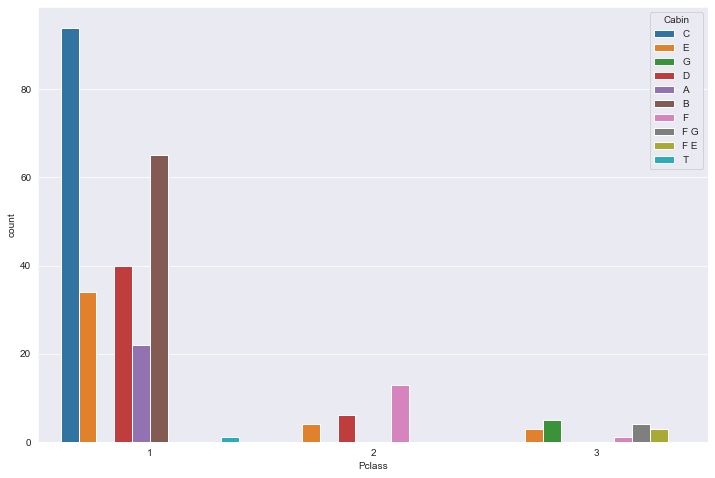

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Pclass', hue='Cabin', data=df);

In [26]:
df.loc[df['Cabin'].isnull()].Pclass.value_counts() #checking pclass of passengers who do not have cabin information

3    693
2    254
1     67
Name: Pclass, dtype: int64

- Passengers who do not have a cabin information have a lower survival rate .I'll fill in the cabin features by looking at the ticket prices and classes of these passengers.

In [27]:
df.groupby(['Pclass', 'Sex', 'Cabin']).agg({'Fare': ['mean', 'count'], 'Survived':'mean'})

Fare        Survived
                           mean count      mean
Pclass Sex    Cabin                            
1      female A       45.214575     4  1.000000
              B      130.924422    36  1.000000
              C      124.188226    46  0.888889
              D       64.375800    21  1.000000
              E       80.118750    14  1.000000
       male   A       40.362033    18  0.428571
              B      111.780031    29  0.400000
              C       92.342538    48  0.343750
              D       52.887937    19  0.461538
              E       51.806875    20  0.533333
              T       35.500000     1  0.000000
2      female D       13.395850     2  1.000000
              E       11.587500     4  0.750000
              F       23.071429     7  1.000000
       male   D       13.695825     4  0.500000
              F       23.833333     6  0.750000
3      female E       12.475000     1  1.000000
              F E     22.358300     1  1.000000
              G       14.205000     5  0.500000
       male   E       10.262500     2  1.000000
              F        7.750000     1  0.000000
              F E      7.229200     2       NaN
              F G      7.650000     4  0.000000

In [28]:
df.loc[df['Cabin'].isnull()].groupby(['Pclass','Sex']).agg({'Fare': ['mean', 'count'],'Survived':'mean'})

Fare        Survived
                     mean count      mean
Pclass Sex                               
1      female  116.305791    23  1.000000
       male     46.203030    44  0.222222
2      female   23.959677    93  0.924242
       male     19.912810   161  0.127451
3      female   15.331003   209  0.492754
       male     12.494977   483  0.131965

In [29]:
df.loc[(df['Cabin'].isnull()) & (df['Pclass'] == 1) & (df['Sex'] =='female'), 'Cabin'] = 'B'
df.loc[(df['Cabin'].isnull()) & (df['Pclass'] == 1) & (df['Sex'] =='male'), 'Cabin'] = 'C'
df.loc[(df['Cabin'].isnull()) & (df['Pclass'] == 2) & (df['Sex'] =='female'), 'Cabin'] = 'E'
df.loc[(df['Cabin'].isnull()) & (df['Pclass'] == 2) & (df['Sex'] =='male'), 'Cabin'] = 'D'
df.loc[(df['Cabin'].isnull()) & (df['Pclass'] == 3) & (df['Sex'] =='female'), 'Cabin'] = 'G'
df.loc[(df['Cabin'].isnull()) & (df['Pclass'] == 3) & (df['Sex'] =='male'), 'Cabin'] = 'F'

### Embarked Feature

In [30]:
df[pd.isnull(df['Embarked'])]  # passengers who have missing value in embarked column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Mrs


In [31]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

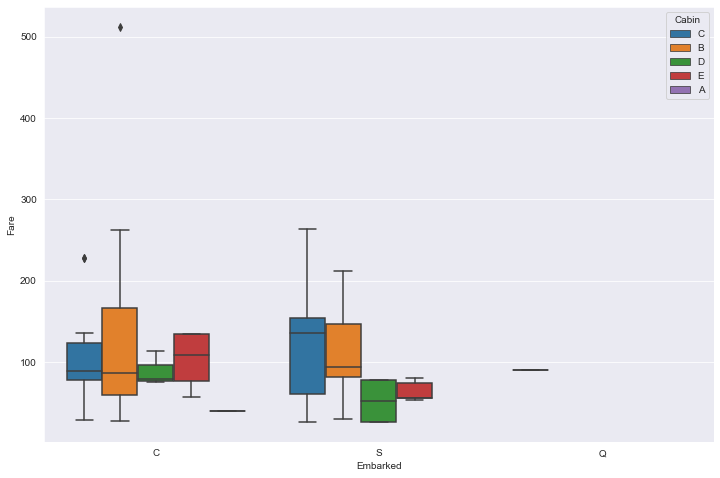

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Embarked', y='Fare', hue='Cabin', data=df.loc[(train['Pclass']==1) & (df['Sex']=='female')]);

- Our two passengers who have null values in embark column are female and 1st class passengers.In addition , both passengers paid a fare of $80 .Although there are quite a lot of Embark S in the data set, these two passengers can be in Embark C according to their features. So, let's fill in the missing values as "C"

In [33]:
df['Embarked'] = df['Embarked'].fillna('C')

### Fare Feature

In [34]:
df[pd.isnull(df['Fare'])] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,F,S,Mr


In [35]:
df.groupby(['Pclass', 'Sex', 'Embarked']).Fare.agg(['mean', 'median'])

mean    median
Pclass Sex    Embarked                      
1      female C         117.830307  83.15830
              Q          90.000000  90.00000
              S         101.069145  78.85000
       male   C          94.622560  62.66875
              Q          90.000000  90.00000
              S          53.670756  35.50000
2      female C          27.003791  27.72080
              Q          12.350000  12.35000
              S          23.023118  23.00000
       male   C          20.904406  15.04580
              Q          11.489160  12.35000
              S          20.073322  13.00000
3      female C          13.834545  14.45420
              Q           9.791968   7.75000
              S          18.083851  13.77500
       male   C           9.775901   7.22920
              Q          10.979167   7.75000
              S          13.145977   8.05000

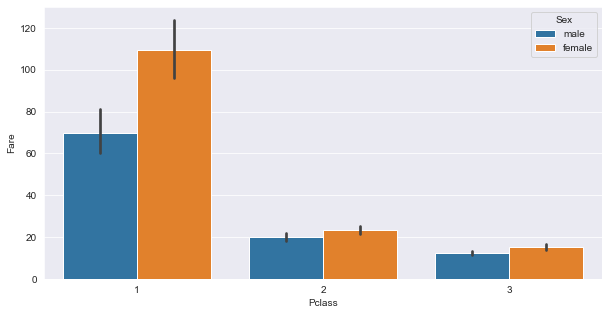

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Fare', hue='Sex', data=df);

- There is a significant difference between classes in the Fare variable. I'll fill in the null Fare row in the test dataset with the median of the 3rd class male passengers who embarked from S.The reason I'll use the median instead of the mean is the data is right skewed.

In [37]:
df['Fare'] = df['Fare'].fillna(8.05)

In [38]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

## Data Cleaning Summary

- I've filled the null values in the embark column with columns that are similar according to some breakdowns such as class , sex or cabin .
- After examining the null rows in the age variable according to Pclass,title and female features, I've filled them with the average value.
- I've felt the need to fill in the cabin column, as the cabin column represents the position of the passengers.Passengers are placed in cabins according to the class they belong to, thus affecting their survival rate.I've filled in the null values according to fare,sex and class features.

# Data Exploration

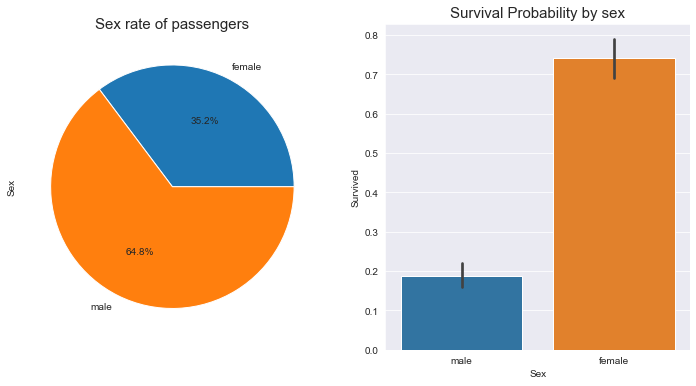

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train.groupby('Sex')['Sex'].count().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Sex rate of passengers', fontsize=15)
plt.subplot(1, 2, 2)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title('Survival Probability by sex', fontsize=15)
plt.show()

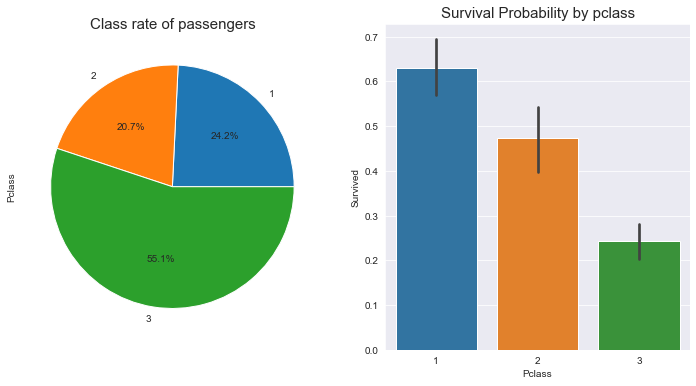

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train.groupby('Pclass')['Pclass'].count().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Class rate of passengers', fontsize=15)
plt.subplot(1, 2, 2)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title('Survival Probability by pclass', fontsize=15)
plt.show()

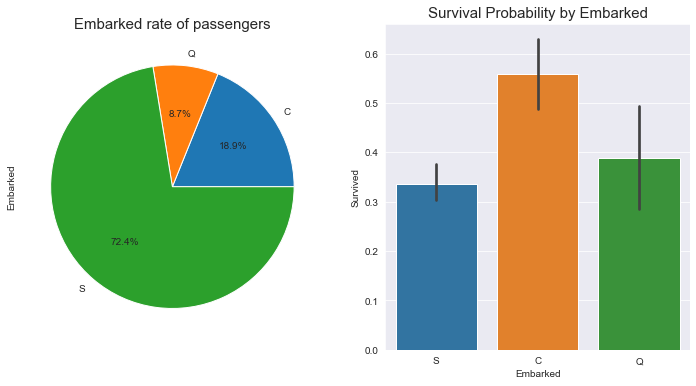

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train.groupby('Embarked')['Embarked'].count().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Embarked rate of passengers', fontsize=15)
plt.subplot(1, 2, 2)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Survival Probability by Embarked', fontsize=15)
plt.show()

### The First Observations

- There are 64.8 percent men and 35.2 percent women on Titanic.The survival probability of women is considerably higher than that of men.
- Most of the passengers(%55.1) on Titanic are 3rd class passengers and their survival probability are much lower.
- 72.4% of passengers embarked from Southampton.Passengers embarked from Cherburg have higher survival probability.

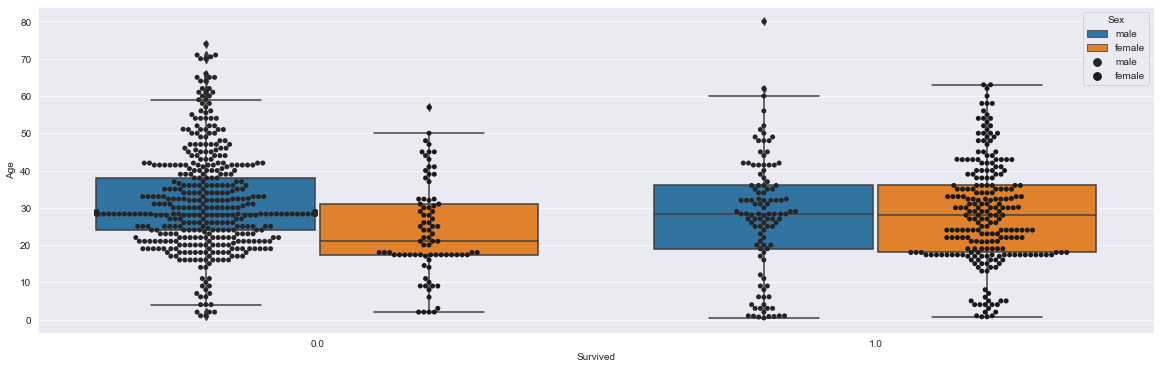

In [42]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='Survived', y='Age', hue='Sex', data=df)
ax = sns.swarmplot(x="Survived", y="Age", hue='Sex' , data=df, dodge=True, color='0.1')

In [43]:
df.groupby(['Sex', 'Survived']).Age.mean()

Sex     Survived
female  0.0         23.988047
        1.0         28.420988
male    0.0         31.291515
        1.0         27.697519
Name: Age, dtype: float64

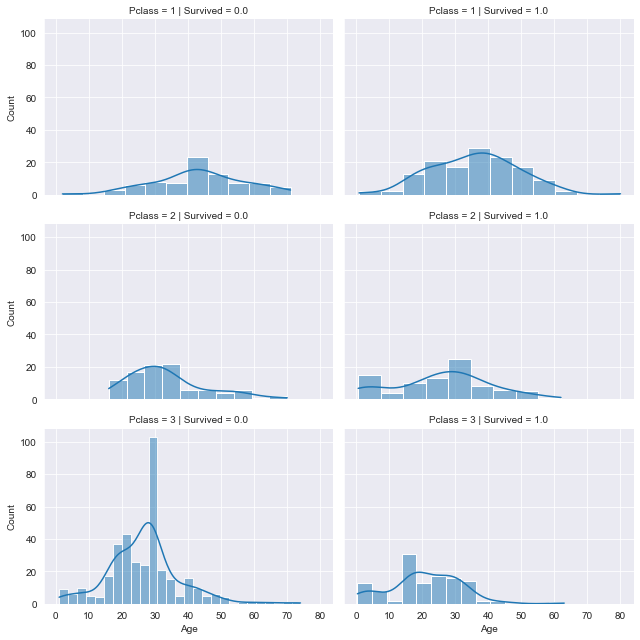

In [44]:
grid=sns.FacetGrid(df, col='Survived', row='Pclass', height=3, aspect=1.5)
grid.map(sns.histplot, 'Age', kde=True);

- We can see that younger 2nd class passengers have a higher probability of survival.
- Babies are more likely to survive than any other age group.

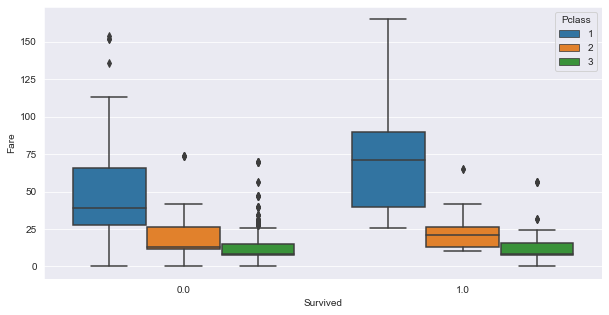

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', hue='Pclass', data=df[df['Fare']<200]);

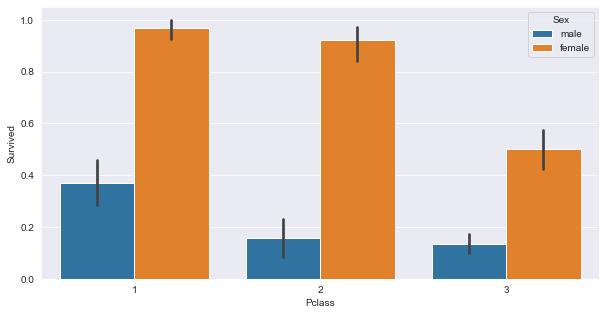

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Pclass", y="Survived", hue='Sex', data=df);

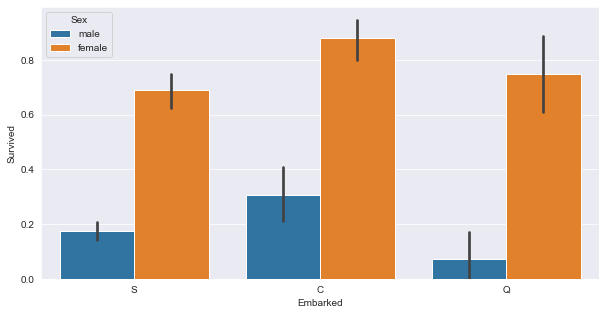

In [47]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Embarked", y="Survived", hue='Sex', data=df);

- I can say that the survival probability of 3rd class female passengers is lower than other female passengers. I can say that the male passengers in the 1st class have a higher survival probability than the other male passengers.
- Male passengers embarked from Cherbourg have a higher survival probability.

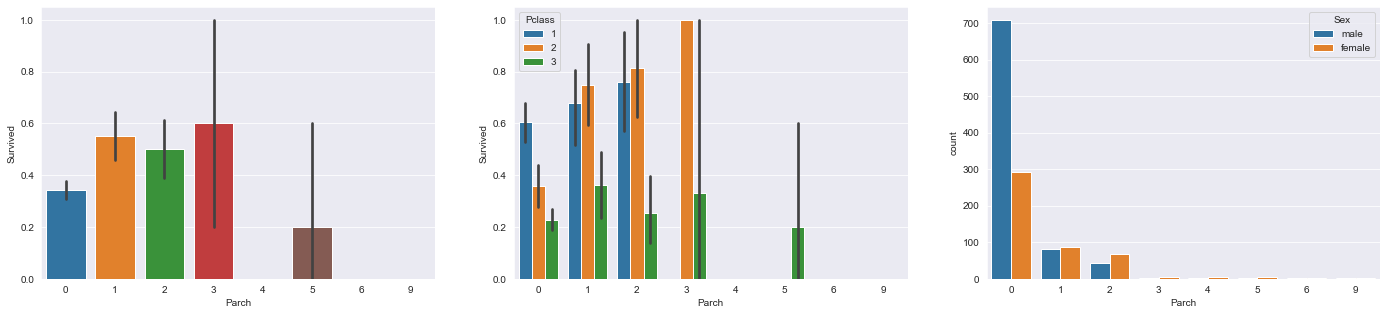

In [48]:
plt.figure(figsize=(24, 5))
plt.subplot(1, 3, 1)
sns.barplot(x="Parch", y="Survived", data=df)
plt.subplot(1, 3, 2)
sns.barplot(x="Parch", y="Survived", hue='Pclass', data=df)
plt.subplot(1, 3, 3)
sns.countplot(x='Parch', hue='Sex', data=df);


- Passengers traveling alone have lower survival probability.The fact that the majority of alone passengers are male has a great effect on this.

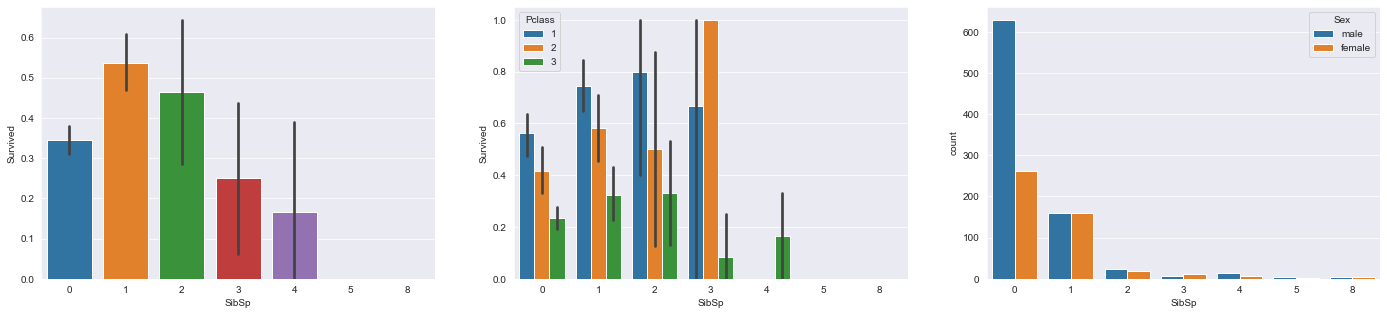

In [49]:
plt.figure(figsize=(24, 5))
plt.subplot(1, 3 ,1)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.subplot(1, 3, 2)
sns.barplot(x="SibSp", y="Survived", hue='Pclass', data=df)
plt.subplot(1, 3, 3)
sns.countplot(x='SibSp', hue='Sex', data=df);

- People with more siblings or spouse on board are less likely to survive but passengers who have no siblings or spouses are also low likely to survive. Because most of the passengers who do not have siblings or spouses are male passengers.

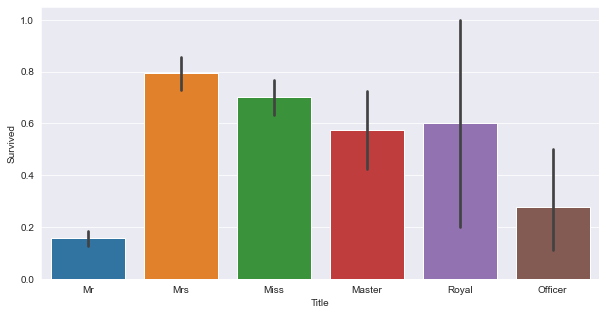

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Title", y="Survived", data=df);

## Data Exploration Summary 

- Pclass, Embarked, and Sex are directly related to survival.
- Female passengers are more likely to survive.
- 1st class passengers are more likely to survive.
- Passengers travelling from Cherbourg port survived more than passengers travelling from other two ports. 
- Contrary to what I expected, the survival possibility for passengers with no family members on Titanic is low. 

# Feature Engineering

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F,S,Mr


In [53]:
drops = ['PassengerId', 'Ticket', 'Name'] #drop the name,passengerid and ticket features since they contains no more useful information.

In [54]:
df.drop(drops, axis=1, inplace=True)

In [55]:
def age_cat(age): #Let's group the age features
    if age <= 12:
        return 'child'
    elif age <= 18:
        return 'teenager'
    elif age <= 25:
        return 'youth'
    elif age <= 60:
        return 'adults'
    else:
        return 'senior'

In [56]:
df['age_group'] = df['Age'].map(age_cat)

In [57]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1 #we can combine all family members in one feature

In [58]:
df['Fare_Per_Person'] = df['Fare'] / (df['FamilySize'])

In [59]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Fare_Per_Person
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.512393,0.498854,0.385027,33.276193,1.883881,20.508690
std,0.486592,0.837836,13.415844,1.041658,0.865560,51.743584,1.583639,35.762320
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000,7.452767
50%,0.000000,3.000000,28.318910,0.000000,0.000000,14.454200,1.000000,8.458300
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.275000,2.000000,24.150000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,11.000000,512.329200


In [60]:
def fare_cat(fare): #we can better observe the effect of fare by grouping
    if fare <= 7.89:
        return 'low_fare'
    elif fare <= 14.454:
        return 'low_mid_fare'
    elif fare <= 31:
        return 'mid_fare'
    elif fare <= 60:
        return  'high_low_fare'
    elif fare <= 100:
        return 'high_fare'
    else:
        return 'top_fare'

In [61]:
df['fare_group'] = df['Fare'].map(fare_cat)

In [62]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age_group,FamilySize,Fare_Per_Person,fare_group
0,0.0,3,male,22.0,1,0,7.2500,F,S,Mr,youth,2,3.62500,low_fare
1,1.0,1,female,38.0,1,0,71.2833,C,C,Mrs,adults,2,35.64165,high_fare
2,1.0,3,female,26.0,0,0,7.9250,G,S,Miss,adults,1,7.92500,low_mid_fare
3,1.0,1,female,35.0,1,0,53.1000,C,S,Mrs,adults,2,26.55000,high_low_fare
4,0.0,3,male,35.0,0,0,8.0500,F,S,Mr,adults,1,8.05000,low_mid_fare


- The last step to perform before we can begin our modeling is  convert all categorical features to numbers .Thus I'll transform our categorical variables by using dummy variables and by using label encoding.


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [65]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [66]:
df = one_hot_encoder(df, ohe_cols)

In [67]:
df.head()

,Survived,Sex,Age,Fare,Fare_Per_Person,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,...,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,fare_group_high_low_fare,fare_group_low_fare,fare_group_low_mid_fare,fare_group_mid_fare,fare_group_top_fare
0,0.0,male,22.0,7.2500,3.62500,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,female,38.0,71.2833,35.64165,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,female,26.0,7.9250,7.92500,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,female,35.0,53.1000,26.55000,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,male,35.0,8.0500,8.05000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


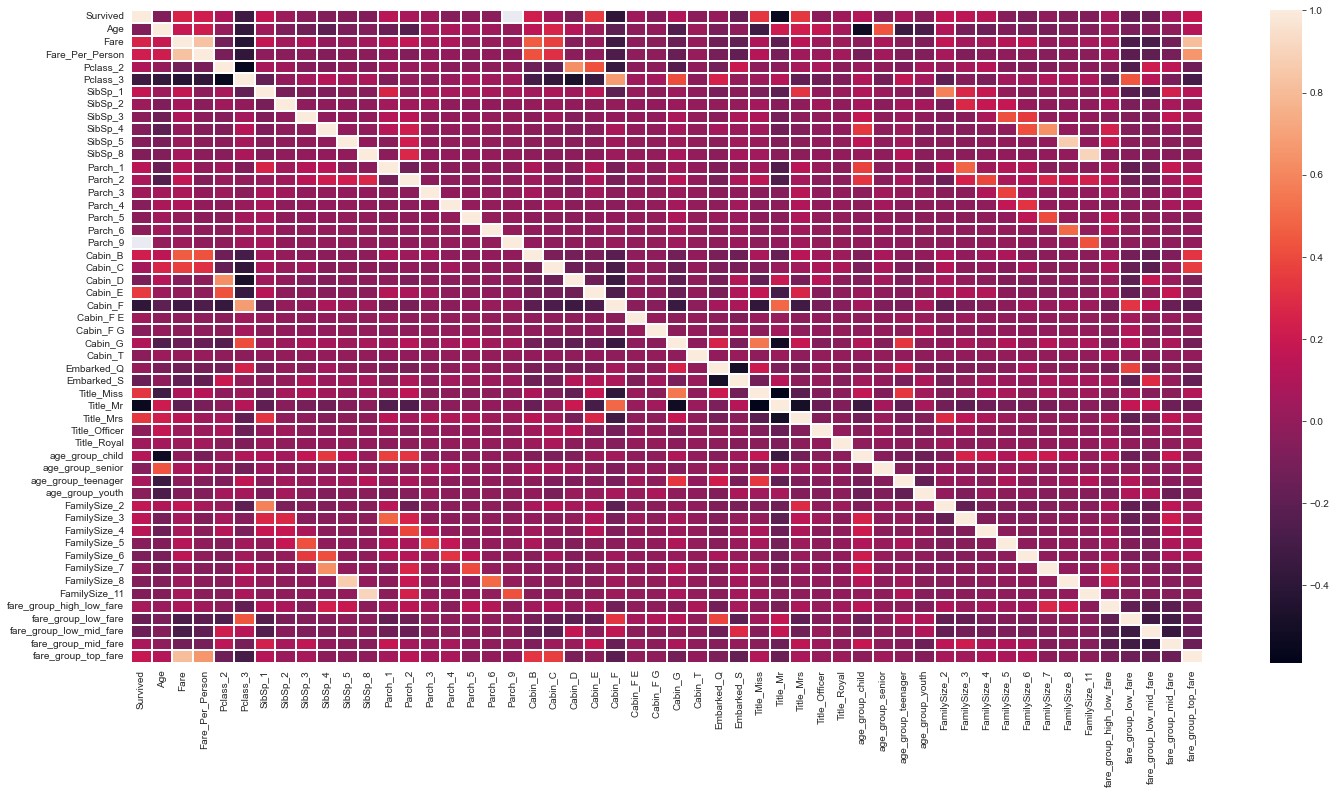

In [68]:
corr=df.corr()
plt.figure(figsize=(24, 12))
sns.heatmap(corr, linewidth=0.1);

### Our data is now in the format we can perform some modeling. 